# Logistic Regression Notebook

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

## Testing for initial hypothesis LeaveOrNot ~ Gender + EverBenched + PaymentTier

In [79]:
employee = pd.read_csv("../data/employee_cleaned.csv")

## Encoding Categories via panda dummy variables

In [80]:
employee = pd.get_dummies(employee, columns=["Gender", "EverBenched","PaymentTier"])
employee = employee.drop(columns=['Age', 'Education', 'ExperienceInCurrentDomain','City','JoiningYear'])

## Partition Data prior to training model

In [81]:
X = employee.loc[:, employee.columns != 'LeaveOrNot']
X = sm.add_constant(X)
y = employee.loc[:, employee.columns == 'LeaveOrNot']

/Users/ivan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

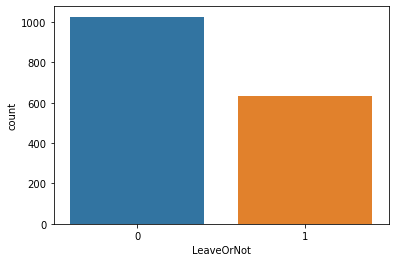

In [83]:
sns.countplot(x="LeaveOrNot", data = y_train)

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

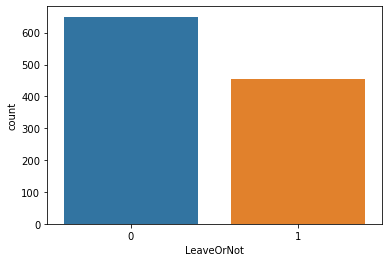

In [84]:
sns.countplot(x="LeaveOrNot", data = y_test)

## Executing Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression().fit(X_train, y_train.values.ravel())

## Predicting Values and Evaluating Metrics

In [86]:
y_pred = logReg.predict(X_test)
ypred = pd.crosstab(y_test['LeaveOrNot'], y_pred, rownames=['Actual'], colnames=['Predicted'])
ypred['Total'] = ypred.sum(axis=1);
ypred.loc['Total'] = ypred.sum()
print(ypred)

Predicted    0    1  Total
Actual                    
0          599   51    650
1          351  105    456
Total      950  156   1106


In [87]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6365280289330922
Precision: 0.6730769230769231
Recall: 0.23026315789473684


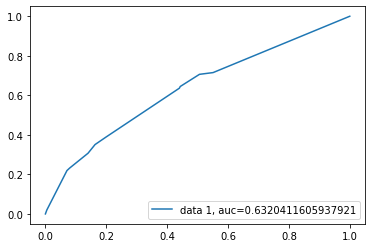

In [88]:
y_pred_proba = logReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [89]:
logreg_sm = sm.Logit(y_train, X_train).fit()
print(logreg_sm.summary2())

         Current function value: 0.625804
         Iterations: 35
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.058     
Dependent Variable: LeaveOrNot       AIC:              2085.1650 
Date:               2022-04-04 21:04 BIC:              2112.2318 
No. Observations:   1658             Log-Likelihood:   -1037.6   
Df Model:           4                LL-Null:          -1102.0   
Df Residuals:       1653             LLR p-value:      7.0975e-27
Converged:          0.0000           Scale:            1.0000    
No. Iterations:     35.0000                                      
------------------------------------------------------------------
                      Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
------------------------------------------------------------------
const                -0.0990       nan  nan    nan     nan     nan
Gender_Female         0.2975       nan  nan    nan     nan     nan
Gender_Male          -0.3965   

/Users/ivan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Testing for alt hypothesis LeaveOrNot ~ City + EverBenched + JoiningYear

In [90]:
employee = pd.read_csv("../data/employee_cleaned.csv")

## Encoding Categories via panda dummy variables

In [91]:
employee = pd.get_dummies(employee, columns=["City","Gender","JoiningYear"])
employee = employee.drop(columns = ['Age','Education','PaymentTier','EverBenched','ExperienceInCurrentDomain'])

## Partition Data prior to training model

In [92]:
X = employee.loc[:, employee.columns != 'LeaveOrNot']
X = sm.add_constant(X)
y = employee.loc[:, employee.columns == 'LeaveOrNot']

/Users/ivan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)

## Validating Partition

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

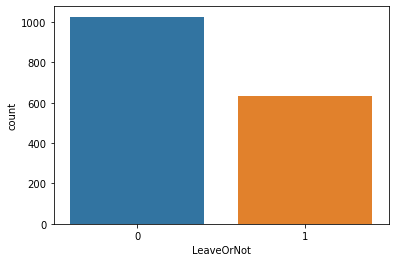

In [94]:
sns.countplot(x="LeaveOrNot", data = y_train)

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

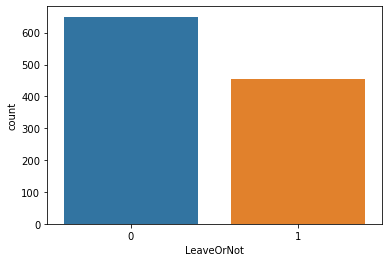

In [95]:
sns.countplot(x="LeaveOrNot", data = y_test)

## Executing Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
logReg = LogisticRegression().fit(X_train, y_train.values.ravel())

## Predicting Values and Evaluating Metrics

In [98]:
y_pred = logReg.predict(X_test)

In [99]:
ypred = pd.crosstab(y_test['LeaveOrNot'], y_pred, rownames = ['Actual'], colnames = ['Predicted'])
ypred['Total'] = ypred.sum(axis=1); ypred.loc['Total'] = ypred.sum()
print(ypred)

Predicted    0    1  Total
Actual                    
0          604   46    650
1          254  202    456
Total      858  248   1106


In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.72875226039783
Precision: 0.8145161290322581
Recall: 0.44298245614035087


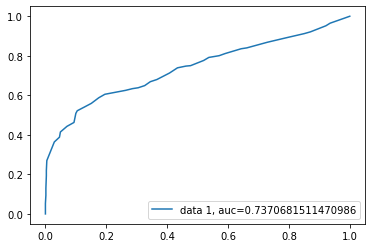

In [101]:
y_pred_proba = logReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [102]:
logreg_sm = sm.Logit(y_train, X_train).fit()
print(logreg_sm.summary2())

         Current function value: 0.547452
         Iterations: 35
                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.176     
Dependent Variable:       LeaveOrNot            AIC:                   1835.3501 
Date:                     2022-04-04 21:04      BIC:                   1889.4837 
No. Observations:         1658                  Log-Likelihood:        -907.68   
Df Model:                 9                     LL-Null:               -1102.0   
Df Residuals:             1648                  LLR p-value:           3.7098e-78
Converged:                0.0000                Scale:                 1.0000    
No. Iterations:           35.0000                                                
---------------------------------------------------------------------------------
                  Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
------------------------------------------------------------------

/Users/ivan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
